In [604]:
import math
import numpy as np
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_style("ticks")
sns.set_context("paper")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [605]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])

three_d_points_names = [
    'Top right solar panel',
    'Top left solar panel',
    'Bottom right solar panel',
    'Bottom left solar panel',
    'Bottom left satellite'
]


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [606]:
folder = "../test_images/dynamic_unknowndeg_0to360_5degstep/"
suffixes = ['_linefit_eps2']
colors = ['red', 'green', 'blue']
nice_suffixes = [s.removeprefix("_").replace('_', ' ').capitalize() for s in suffixes]


In [607]:
df_true = pd.read_csv(folder + "real_scores.csv")
df_true = df_true.rename(columns={'correct_roll': 'roll', 'correct_pitch': 'pitch', 'correct_yaw':
    'yaw'})
df_true['img_number'] = df_true.index
df_true['suffix'] = 'true'
df_true

,roll,pitch,yaw,img_number,suffix
0,127.970000,-79.560000,-44.000000,0,true
1,123.295573,-78.244572,-44.152291,1,true
2,119.068439,-76.935369,-44.763274,2,true
3,115.161870,-75.638750,-45.707437,3,true
4,111.491226,-74.359729,-46.901282,4,true
...,...,...,...,...,...
68,157.623186,-84.620406,-54.433702,68,true
69,147.366750,-83.432329,-48.971823,69,true
70,139.573127,-82.170727,-45.978678,70,true
71,133.288987,-80.872993,-44.502381,71,true


In [608]:
df_guess = pd.read_csv(folder + "guesses_linefit_eps2.csv")
df_guess

,img_number,roll,pitch,yaw,x,y,z,roll_min,roll_max,pitch_min,pitch_max,yaw_min,yaw_max,x_min,x_max,y_min,y_max,z_min,z_max
0,0,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-16.000000,16.000000,-97.550000,-81.550000,71.000000,87.000000,-0.400000,0.400000,-0.400000,0.400000,-0.400000,0.400000
1,1,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-52.000000,52.000000,-115.550000,-63.550000,53.000000,105.000000,-1.300000,1.300000,-1.300000,1.300000,-1.300000,1.300000
2,2,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-88.000000,88.000000,-133.550000,-45.550000,35.000000,123.000000,-2.200000,2.200000,-2.200000,2.200000,-2.200000,2.200000
3,3,22.256641,-63.873938,54.799690,0.350045,0.261359,0.421166,14.256641,30.256641,-67.873938,-59.873938,50.799690,58.799690,0.150045,0.550045,0.061359,0.461359,0.221166,0.621166
4,4,15.455419,-66.078910,56.657928,0.329477,0.249976,0.221166,7.455419,23.455419,-70.078910,-62.078910,52.657928,60.657928,0.129477,0.529477,0.049976,0.449976,0.021166,0.421166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,-691.847321,-54.766310,85.362543,0.102879,0.136890,-0.960782,-698.161185,-685.533458,-55.749913,-53.782708,78.844301,91.880784,0.085893,0.119864,0.117769,0.156011,-1.205516,-0.716048
140,140,-694.662284,-53.953368,83.399348,0.087311,0.142881,-1.198592,-699.430117,-689.894452,-54.858524,-53.048212,78.410832,88.387864,0.070325,0.104296,0.124084,0.161679,-1.402073,-0.995111
141,141,-697.890541,-53.644001,81.938396,0.084104,0.145469,-1.270090,-701.470869,-694.310213,-54.697122,-52.590880,78.156787,85.720005,0.065479,0.102729,0.128560,0.162378,-1.495169,-1.045011
142,142,-699.333277,-53.251853,78.238175,0.076459,0.171666,-1.419246,-701.901057,-696.765497,-54.343349,-52.160357,75.421451,81.054900,0.057651,0.095268,0.153638,0.189694,-1.648463,-1.190029


In [609]:
df = pd.read_csv(folder + "fine_scores_linefit_eps2.csv")
df

,img_number,iterations,loss,roll,pitch,yaw,x,y,z
0,0,1344,4.637374e+02,3.486136,-97.550000,87.000000,0.119017,0.021308,-0.400000
1,1,4760,2.137181e+01,3.257037,-77.996656,80.113230,0.355762,0.127216,0.954683
2,2,616,1.960658e-11,22.256641,-63.873938,54.799690,0.350045,0.261359,0.421166
3,3,525,2.650543e-03,15.455419,-66.078910,56.657928,0.329477,0.249976,0.221166
4,4,616,9.643765e-11,8.411935,-67.981144,58.670265,0.328030,0.241446,0.192897
...,...,...,...,...,...,...,...,...,...
139,139,455,5.773799e-12,-690.133398,-55.227598,83.748589,0.103763,0.137641,-0.957211
140,140,378,1.260496e-02,-693.937243,-54.858524,82.858921,0.099403,0.139244,-1.040112
141,141,301,7.234565e-02,-696.005682,-54.343237,79.821961,0.090607,0.162378,-1.198493
142,142,336,6.815011e-03,-698.842073,-54.123910,78.118301,0.090251,0.163987,-1.190029


In [610]:
df_guess

,img_number,roll,pitch,yaw,x,y,z,roll_min,roll_max,pitch_min,pitch_max,yaw_min,yaw_max,x_min,x_max,y_min,y_max,z_min,z_max
0,0,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-16.000000,16.000000,-97.550000,-81.550000,71.000000,87.000000,-0.400000,0.400000,-0.400000,0.400000,-0.400000,0.400000
1,1,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-52.000000,52.000000,-115.550000,-63.550000,53.000000,105.000000,-1.300000,1.300000,-1.300000,1.300000,-1.300000,1.300000
2,2,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-88.000000,88.000000,-133.550000,-45.550000,35.000000,123.000000,-2.200000,2.200000,-2.200000,2.200000,-2.200000,2.200000
3,3,22.256641,-63.873938,54.799690,0.350045,0.261359,0.421166,14.256641,30.256641,-67.873938,-59.873938,50.799690,58.799690,0.150045,0.550045,0.061359,0.461359,0.221166,0.621166
4,4,15.455419,-66.078910,56.657928,0.329477,0.249976,0.221166,7.455419,23.455419,-70.078910,-62.078910,52.657928,60.657928,0.129477,0.529477,0.049976,0.449976,0.021166,0.421166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,-691.847321,-54.766310,85.362543,0.102879,0.136890,-0.960782,-698.161185,-685.533458,-55.749913,-53.782708,78.844301,91.880784,0.085893,0.119864,0.117769,0.156011,-1.205516,-0.716048
140,140,-694.662284,-53.953368,83.399348,0.087311,0.142881,-1.198592,-699.430117,-689.894452,-54.858524,-53.048212,78.410832,88.387864,0.070325,0.104296,0.124084,0.161679,-1.402073,-0.995111
141,141,-697.890541,-53.644001,81.938396,0.084104,0.145469,-1.270090,-701.470869,-694.310213,-54.697122,-52.590880,78.156787,85.720005,0.065479,0.102729,0.128560,0.162378,-1.495169,-1.045011
142,142,-699.333277,-53.251853,78.238175,0.076459,0.171666,-1.419246,-701.901057,-696.765497,-54.343349,-52.160357,75.421451,81.054900,0.057651,0.095268,0.153638,0.189694,-1.648463,-1.190029


In [611]:
def plot_guess(guess_type, df=df_guess):
    sns.lineplot(data=df, x='img_number', y=guess_type, color='blue', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_min', color='red', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_max', color='green', ci=None)
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='black')
    plt.legend(['Guess', 'Min', 'Max', 'Lowest loss estimate'])
    plt.title('SMA ' + guess_type + ' guesses')
    plt.xlabel('Image number')
    plt.ylabel(guess_type + ' (deg)')
    plt.show()

In [612]:
df_guess_mod = df_guess.copy()
# df_guess['roll'] go from -180 to 180
df_guess_mod['roll'] = df_guess['roll'] % 360 - 180
# pitch goes from 0 - 180 to -90 - 90
df_guess_mod['pitch'] = df_guess['pitch'] % 360 - 180
df_guess_mod['yaw'] = df_guess['yaw'] % 360 - 180

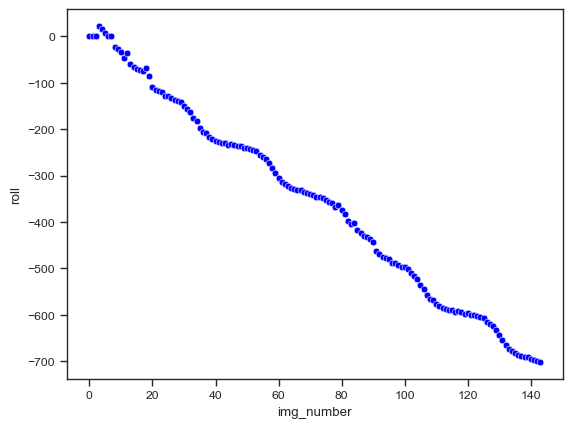

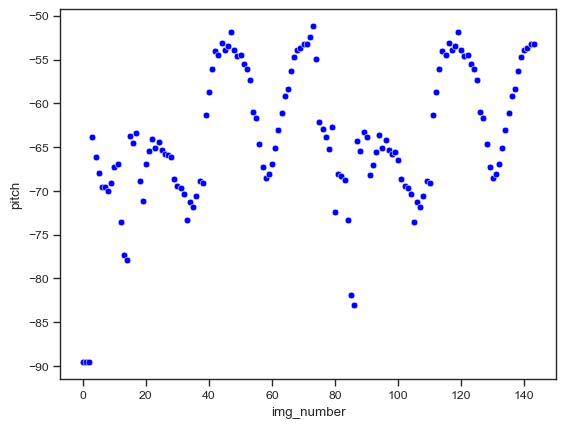

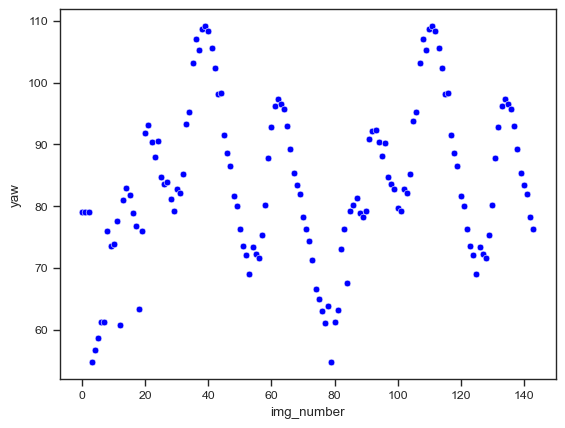

In [613]:
for guess_type in ['roll', 'pitch', 'yaw']:
    # sns.scatterplot(data=df_true, x='img_number', y=guess_type, color='black')
    sns.scatterplot(data=df_guess, x='img_number', y=guess_type, color='blue')
    plt.show()

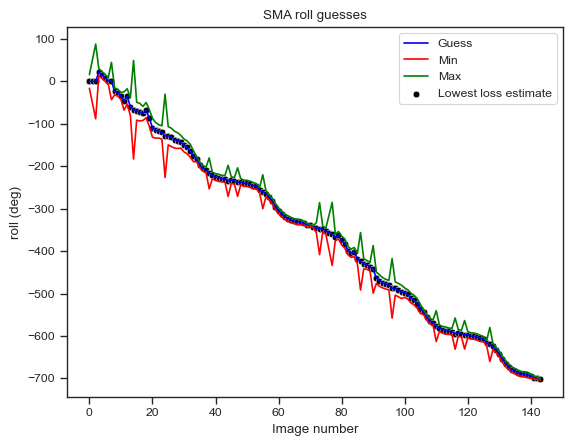

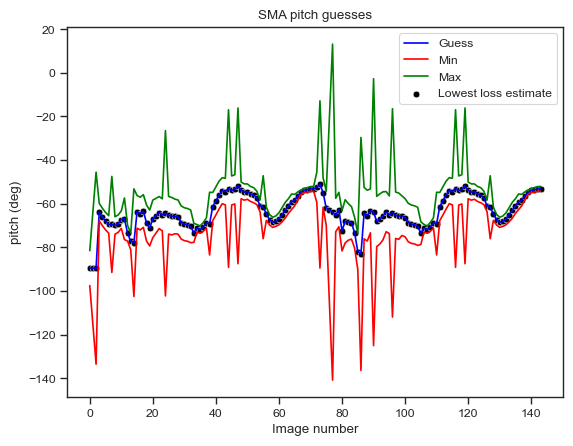

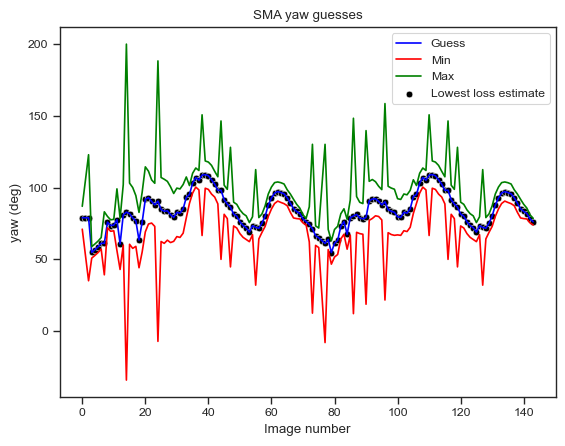

In [614]:
for guess_type in ['roll', 'pitch', 'yaw']:
    plot_guess(guess_type)

In [615]:
# def plot_reg(guess_type):
#     sns.regplot(data=df_guess, x='true_' + guess_type, y='guess_' + guess_type, ci=None)
#     plt.show()

In [616]:
# for guess_type in ['roll', 'pitch', 'yaw']:
#     plot_reg(guess_type)

In [617]:
df_rotated_points = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x', 1: 'y', 2: 'z'})
    df_local['img_number'] = df['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points = pd.concat([df_local, df_rotated_points])

In [618]:
df_rotated_points.to_csv(folder + 'rotated_points.csv', index=False)

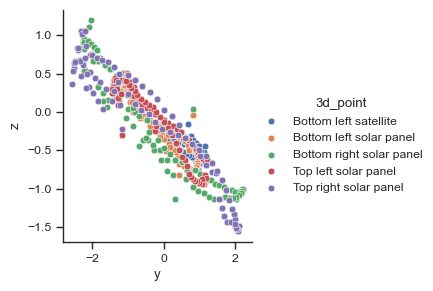

In [619]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'y', 'z').add_legend()

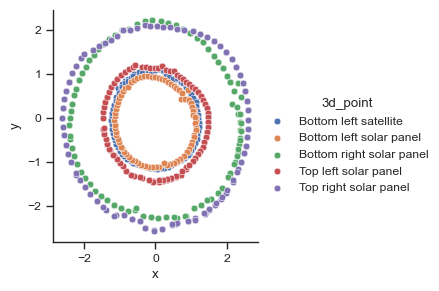

In [620]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'x', 'y').add_legend()

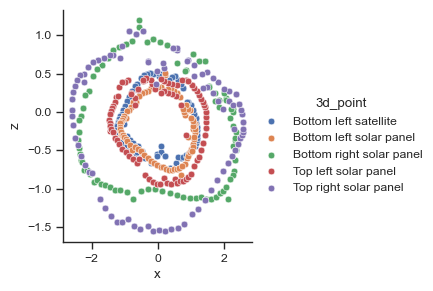

In [621]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'x', 'z').add_legend()